# Unemployment Analysis

### Guidelines

1.Investigating the relationship between employment levels and key demographic factors,including education, gender, race, and age categories.

2.Analyzing how employment trends have evolved over time for distinct demographic groups, such as women, different age brackets, and diverse racial or ethnic backgrounds.

3.Exploring potential connections between the employment-to-population ratio and economic metrics like GDP growth and unemployment rates.

4.Examining whether educational attainment influences employment rates within various racial and ethnic groups.

5.Studying variations in employment rates during economic challenges, such as recessions, and periods of economic prosperity.

6.Predicting the unemployment rate.


### Importing Libraries


In [1]:
#libraries required for the analysis- they will help in reading dataframe, visualization, checking accuracy of predicting model
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error #checking accuracy of our model
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX # The model used in prediction
from math import sqrt #checking accuracy of our model
from statsmodels.stats.multicomp import pairwise_tukeyhsd #hypothesing testing



### Importing Dataset

In [2]:
#importing and giving the data a variable name 'df'
df = pd.read_csv('unemployed.csv')
df.head(5)

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000


In [3]:
# checking missing values
df.isna().sum()

date                           0
all                            0
16-24                          0
25-54                          0
55-64                          0
                              ..
white_men_high_school          0
white_men_some_college         0
white_men_bachelor's_degree    0
white_men_advanced_degree      0
population_over_16             0
Length: 122, dtype: int64

In [4]:
#checking our columns
df.columns

Index(['date', 'all', '16-24', '25-54', '55-64', '65+', 'less_than_hs',
       'high_school', 'some_college', 'bachelor's_degree',
       ...
       'white_men_16-24', 'white_men_25-54', 'white_men_55-64',
       'white_men_65+', 'white_men_less_than_hs', 'white_men_high_school',
       'white_men_some_college', 'white_men_bachelor's_degree',
       'white_men_advanced_degree', 'population_over_16'],
      dtype='object', length=122)

## Employment and Demographic

### Employment levels and gender

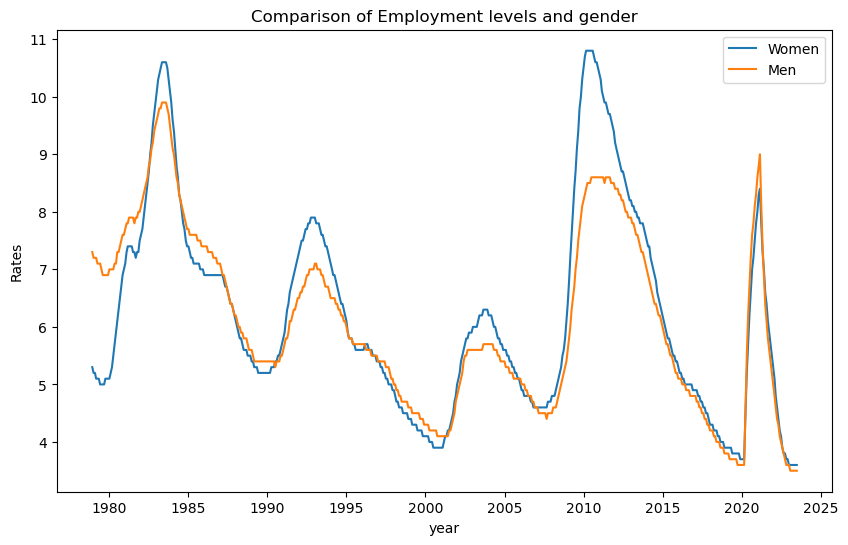

In [5]:
#converting date column to data type datetime
df['date'] = pd.to_datetime(df['date'])

# setting the 'date' column to index
df.set_index('date', inplace=True)

#visualizing
plt.figure(figsize=(10, 6)) #chart size
plt.plot(df.index, df["men"], label="Women") # column
plt.plot(df.index, df["women"], label="Men") # column

plt.title('Comparison of Employment levels and gender') #title
plt.xlabel('year')
plt.ylabel('Rates')
plt.legend()
plt.show()


### Employment levels and race

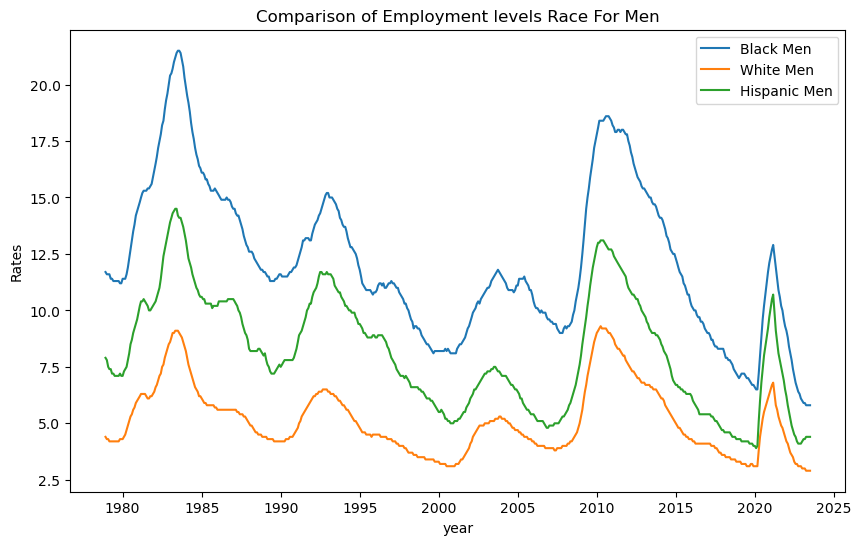

In [6]:
# checking for men
#visualizing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["black_men"], label="Black Men")
plt.plot(df.index, df["white_men"], label="White Men")
plt.plot(df.index, df["hispanic_men"], label="Hispanic Men")


plt.title('Comparison of Employment levels Race For Men')
plt.xlabel('year')
plt.ylabel('Rates')
plt.legend()
plt.show()


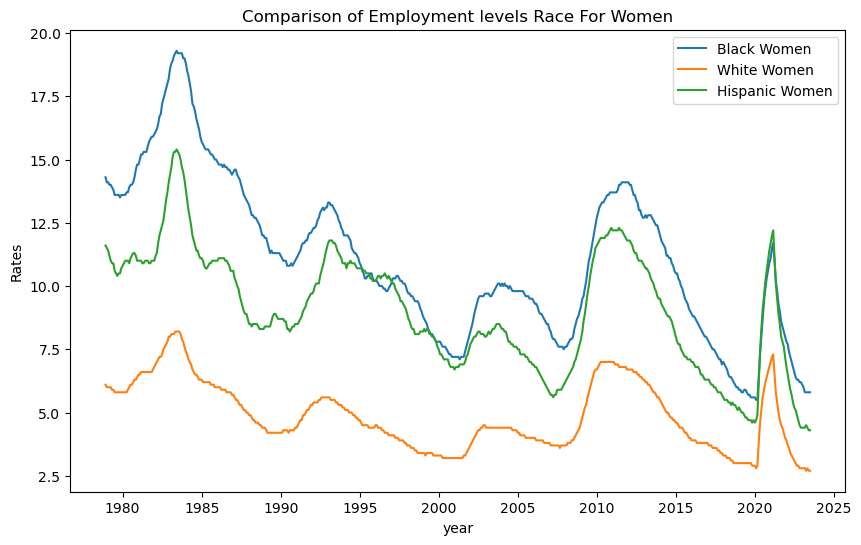

In [7]:
#checking for women
#visualizing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["black_women"], label="Black Women")
plt.plot(df.index, df["white_women"], label="White Women")
plt.plot(df.index, df["hispanic_women"], label="Hispanic Women")


plt.title('Comparison of Employment levels Race For Women')
plt.xlabel('year')
plt.ylabel('Rates')
plt.legend()
plt.show()

### Employment levels and age

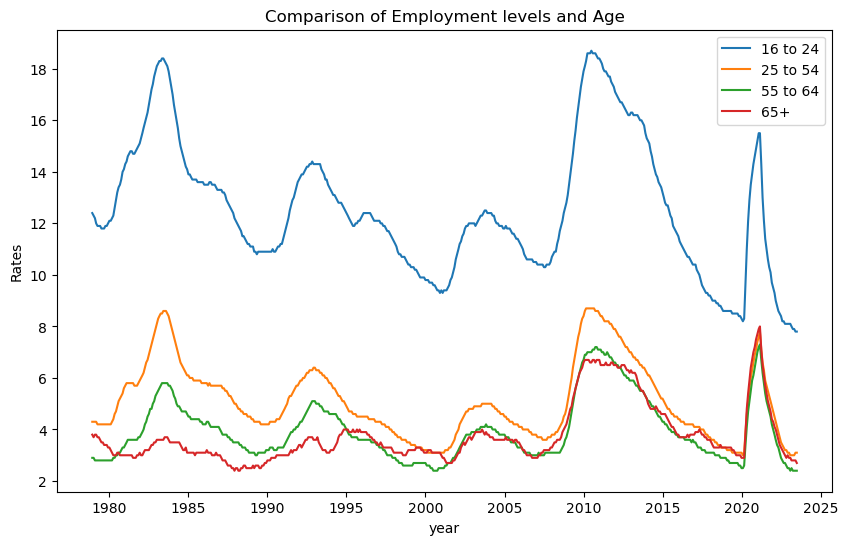

In [8]:
#checking general age levels
#visualizing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["16-24"], label="16 to 24")
plt.plot(df.index, df["25-54"], label="25 to 54")
plt.plot(df.index, df["55-64"], label="55 to 64")
plt.plot(df.index, df["65+"], label="65+")


plt.title('Comparison of Employment levels and Age')
plt.xlabel('year')
plt.ylabel('Rates')
plt.legend()
plt.show()

### Employment levels and education

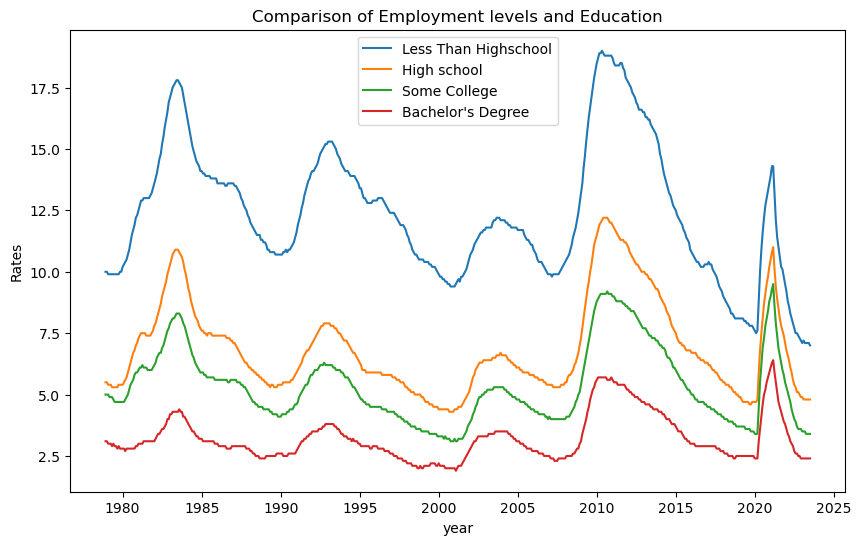

In [9]:
# checking general levels
#visualizing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["less_than_hs"], label="Less Than Highschool")
plt.plot(df.index, df["high_school"], label="High school")
plt.plot(df.index, df["some_college"], label="Some College")
plt.plot(df.index, df["bachelor's_degree"], label="Bachelor's Degree")


plt.title('Comparison of Employment levels and Education')
plt.xlabel('year')
plt.ylabel('Rates')
plt.legend()
plt.show()

## Temporal Employment Patterns

### women vs men over time

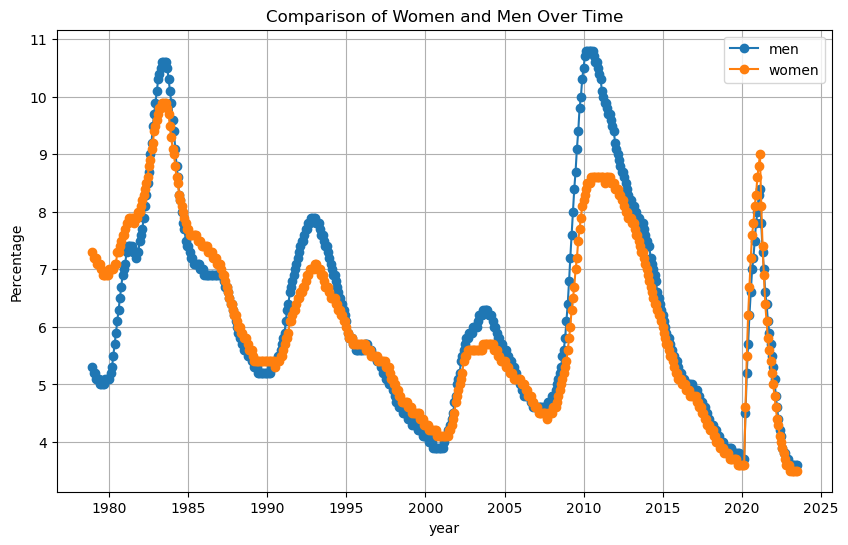

In [10]:
#visualizing
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["men"], label='men', marker='o')
plt.plot(df.index, df["women"], label='women', marker='o')

plt.title('Comparison of Women and Men Over Time')
plt.xlabel('year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

### races for women over time

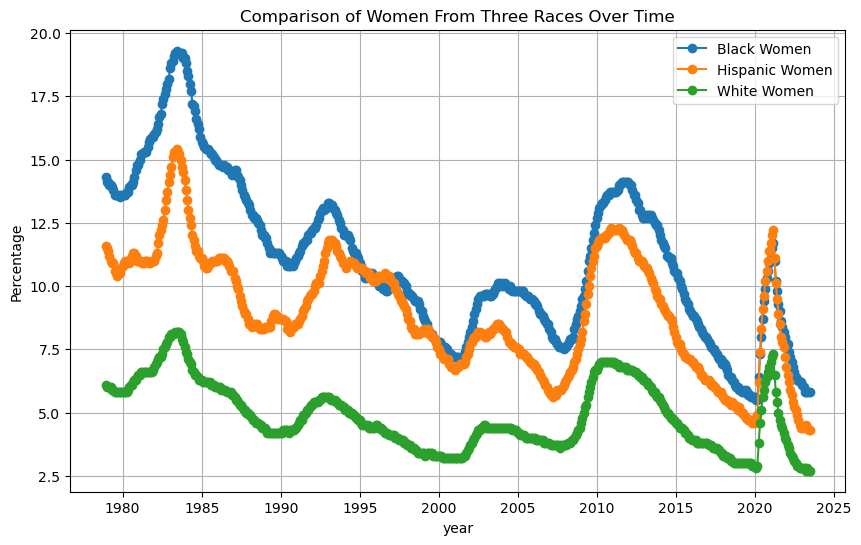

In [11]:
#comparing races for women
#visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["black_women"], label="Black Women", marker='o')
plt.plot(df.index, df["hispanic_women"], label="Hispanic Women", marker='o')
plt.plot(df.index, df["white_women"], label="White Women", marker='o')

plt.title('Comparison of Women From Three Races Over Time')
plt.xlabel('year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

### races for men over time

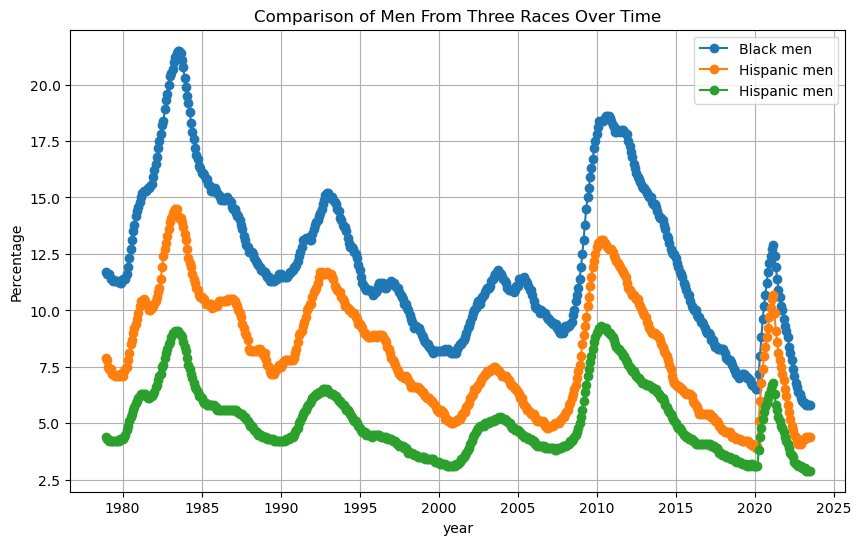

In [12]:
#comparing races for men
#visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["black_men"], label="Black men", marker='o')
plt.plot(df.index, df["hispanic_men"], label="Hispanic men", marker='o')
plt.plot(df.index, df["white_men"], label="Hispanic men", marker='o')

plt.title('Comparison of Men From Three Races Over Time')
plt.xlabel('year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

### 16-24 over time

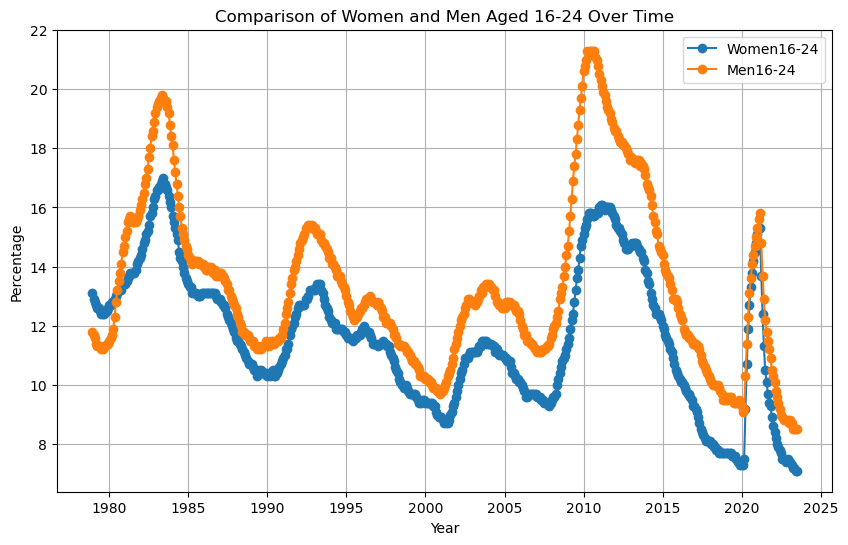

In [13]:
# checking age categories for men and women (16-24)
# visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["women_16-24"], label="Women16-24", marker='o')
plt.plot(df.index, df["men_16-24"], label="Men16-24", marker='o')


plt.title('Comparison of Women and Men Aged 16-24 Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

### 25-54 over time

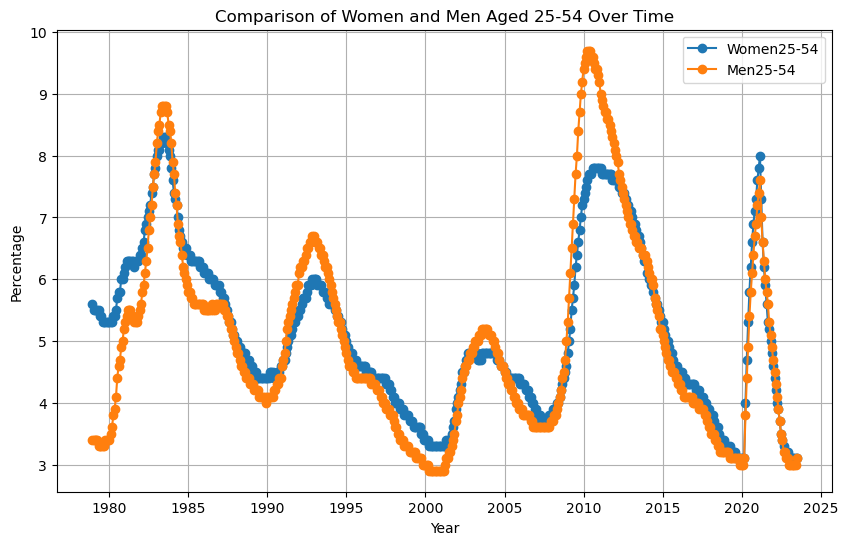

In [14]:
# checking age categories for men and women (25-54)
# visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["women_25-54"], label="Women25-54", marker='o')
plt.plot(df.index, df["men_25-54"], label="Men25-54", marker='o')


plt.title('Comparison of Women and Men Aged 25-54 Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

### 55-64 over time

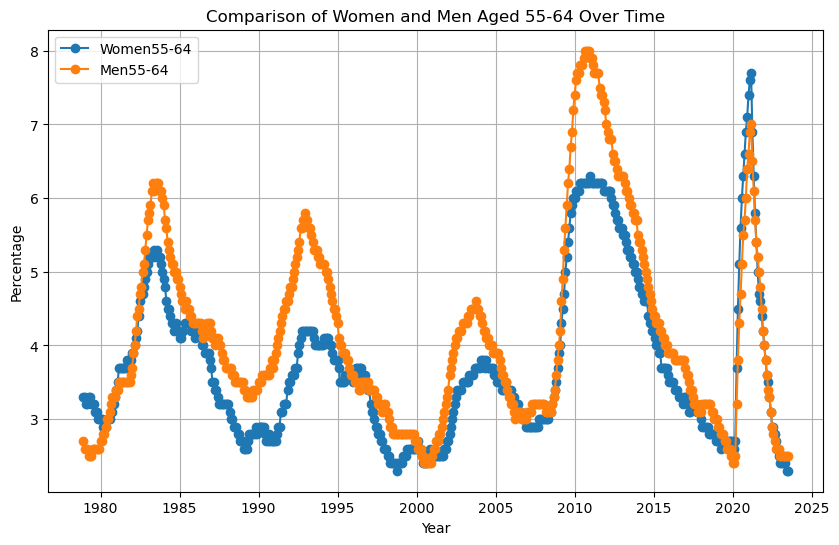

In [15]:
# checking age categories for men and women (55-64)
# visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["women_55-64"], label="Women55-64", marker='o')
plt.plot(df.index, df["men_55-64"], label="Men55-64", marker='o')


plt.title('Comparison of Women and Men Aged 55-64 Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

### 65+ over time

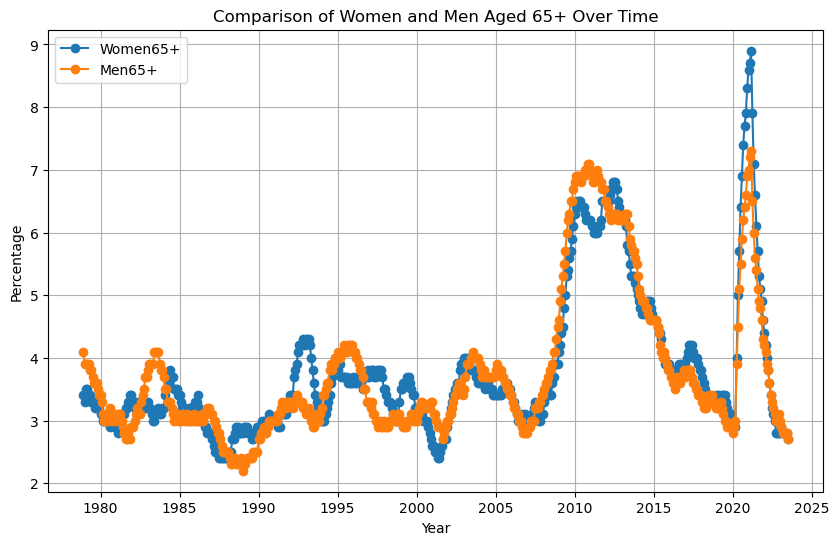

In [16]:
# checking age categories for men and women (65+)
# visualization
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["women_65+"], label="Women65+", marker='o')
plt.plot(df.index, df["men_65+"], label="Men65+", marker='o')


plt.title('Comparison of Women and Men Aged 65+ Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Educational Impacts on Employment

### Educational Attainments Race for women

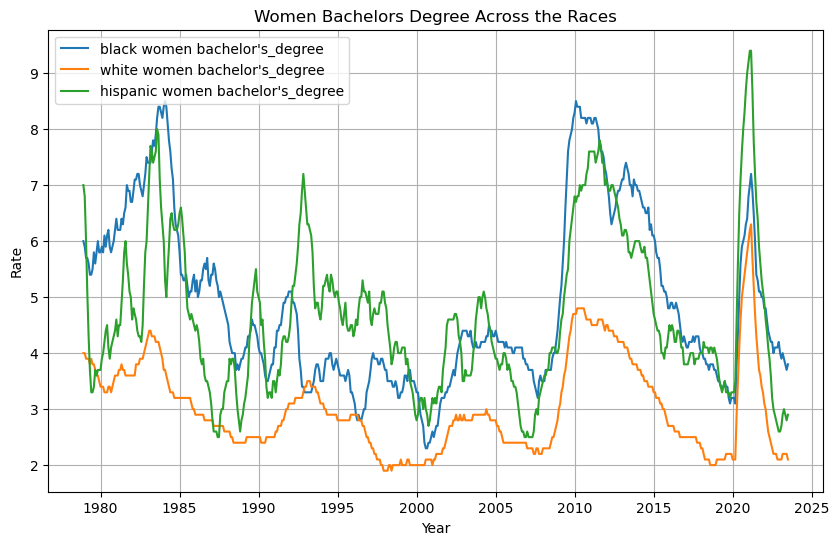

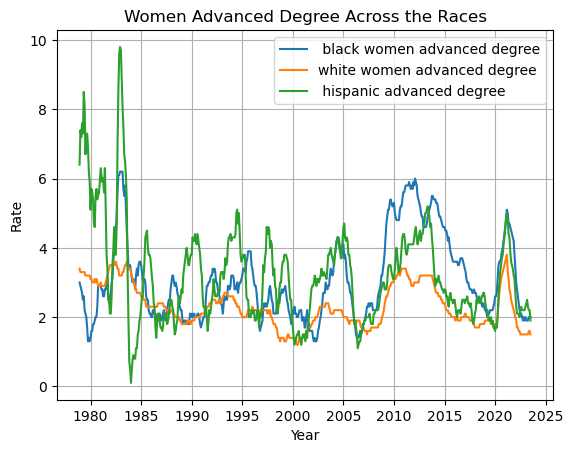

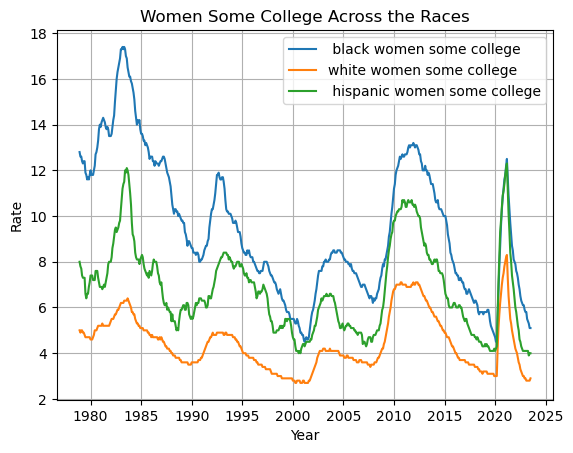

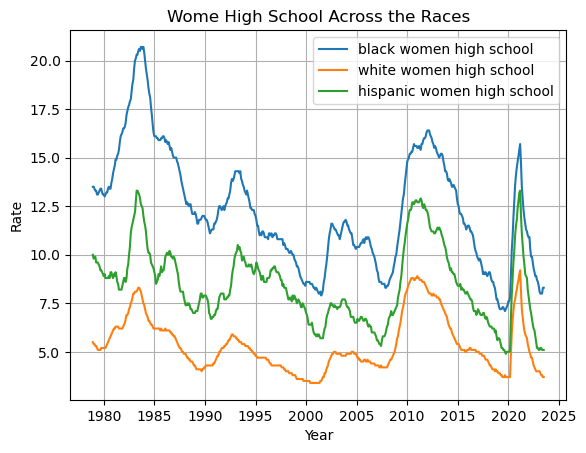

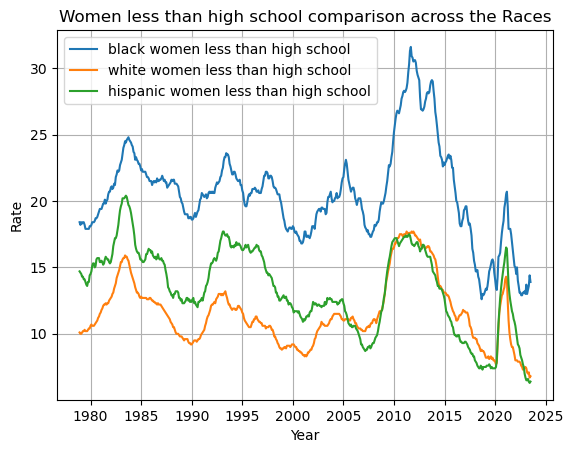

In [17]:
#Bachelors Degree
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["black_women_bachelor's_degree"], label="black women bachelor's_degree")
plt.plot(df.index, df["white_women_bachelor's_degree"], label="white women bachelor's_degree")
plt.plot(df.index, df["hispanic_women_bachelor's_degree"], label="hispanic women bachelor's_degree")
plt.title('Women Bachelors Degree Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Advanced Degree
plt.plot(df.index, df["black_women_advanced_degree"], label=" black women advanced degree")
plt.plot(df.index, df["white_women_advanced_degree"], label="white women advanced degree")
plt.plot(df.index, df["hispanic_women_advanced_degree"], label=" hispanic advanced degree")
plt.title('Women Advanced Degree Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# some college
plt.plot(df.index, df["black_women_some_college"], label=" black women some college")
plt.plot(df.index, df["white_women_some_college"], label="white women some college")
plt.plot(df.index, df["hispanic_women_some_college"], label=" hispanic women some college")
plt.title('Women Some College Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

#men high school
plt.plot(df.index, df["black_women_high_school"], label="black women high school")
plt.plot(df.index, df["white_women_high_school"], label="white women high school")
plt.plot(df.index, df["hispanic_women_high_school"], label="hispanic women high school")
plt.title('Wome High School Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Men less than high school 
plt.plot(df.index, df["black_women_less_than_hs"], label="black women less than high school")
plt.plot(df.index, df["white_women_less_than_hs"], label="white women less than high school")
plt.plot(df.index, df["hispanic_women_less_than_hs"], label="hispanic women less than high school")
plt.title('Women less than high school comparison across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

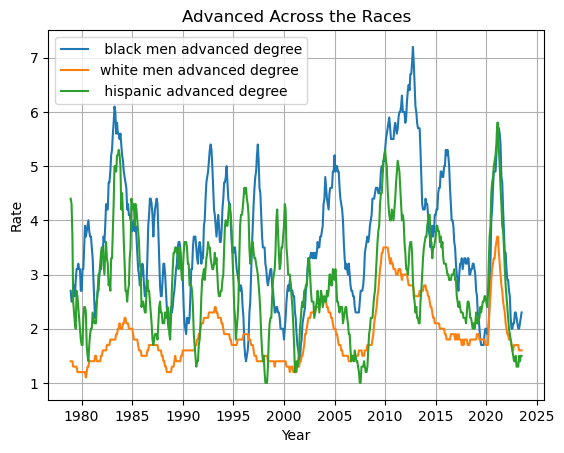

In [18]:
# advanced degree
plt.plot(df.index, df["black_men_advanced_degree"], label=" black men advanced degree")
plt.plot(df.index, df["white_men_advanced_degree"], label="white men advanced degree")
plt.plot(df.index, df["hispanic_men_advanced_degree"], label=" hispanic advanced degree")
plt.title('Advanced Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

### Educational Attainments Race for men

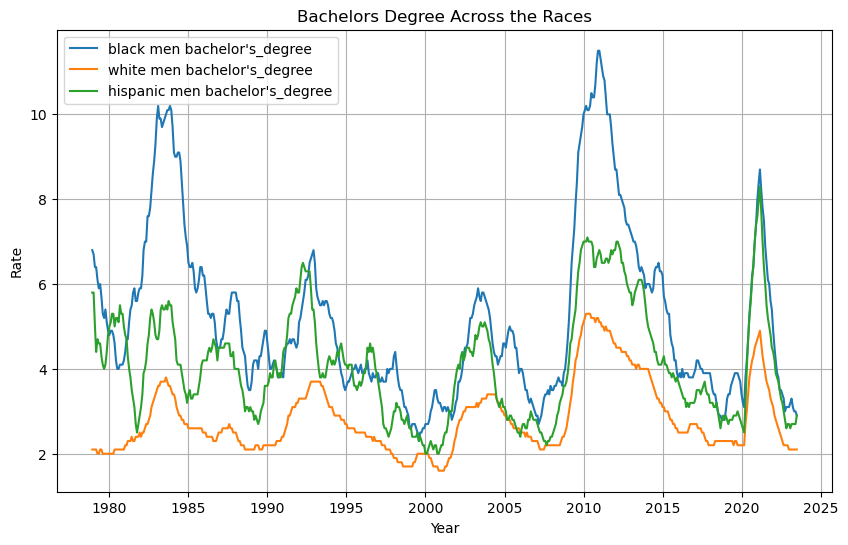

In [19]:
#Bachelors Degree
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["black_men_bachelor's_degree"], label="black men bachelor's_degree")
plt.plot(df.index, df["white_men_bachelor's_degree"], label="white men bachelor's_degree")
plt.plot(df.index, df["hispanic_men_bachelor's_degree"], label="hispanic men bachelor's_degree")
plt.title('Bachelors Degree Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()


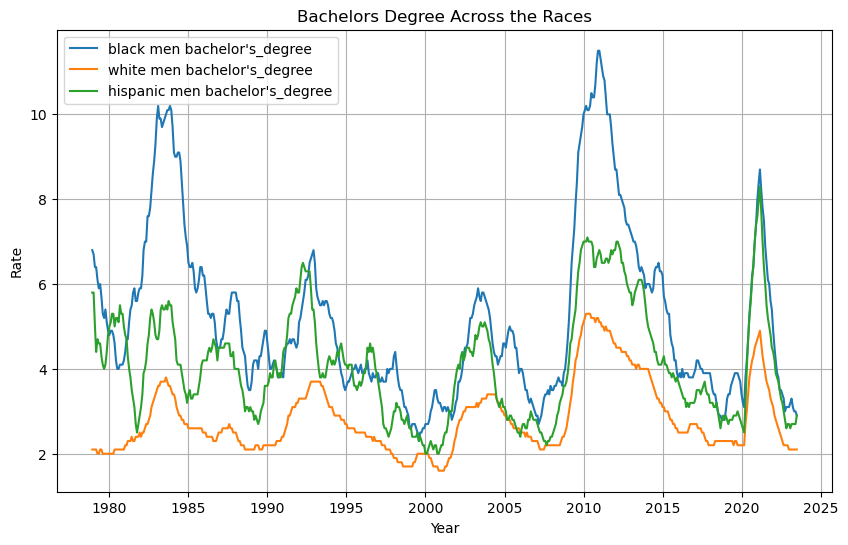

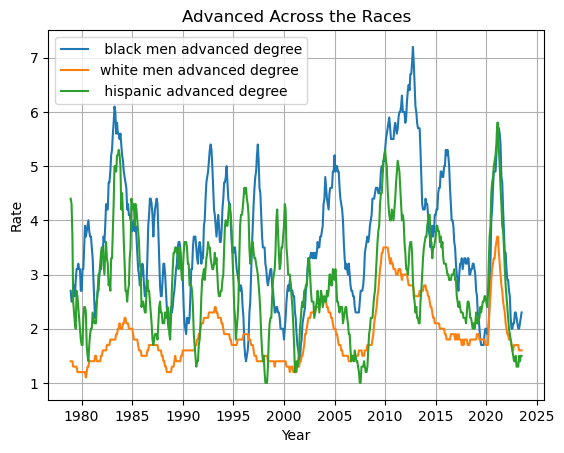

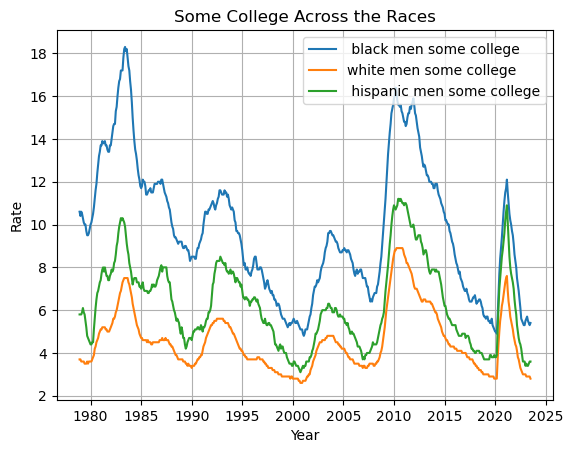

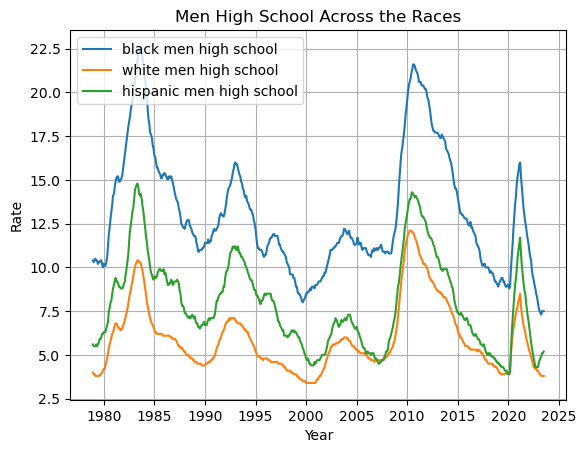

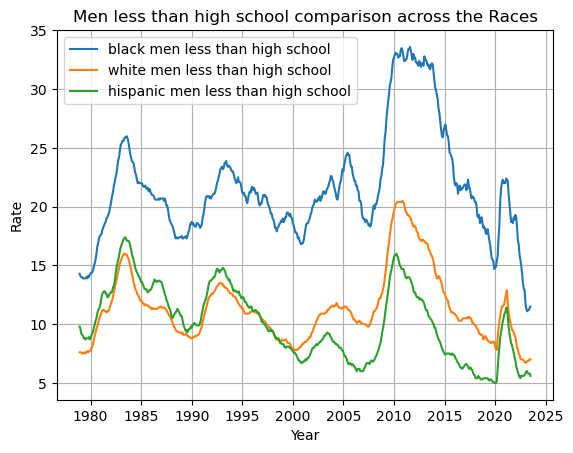

In [20]:
# visualization

#Bachelors Degree
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["black_men_bachelor's_degree"], label="black men bachelor's_degree")
plt.plot(df.index, df["white_men_bachelor's_degree"], label="white men bachelor's_degree")
plt.plot(df.index, df["hispanic_men_bachelor's_degree"], label="hispanic men bachelor's_degree")
plt.title('Bachelors Degree Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# advanced degree
plt.plot(df.index, df["black_men_advanced_degree"], label=" black men advanced degree")
plt.plot(df.index, df["white_men_advanced_degree"], label="white men advanced degree")
plt.plot(df.index, df["hispanic_men_advanced_degree"], label=" hispanic advanced degree")
plt.title('Advanced Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# some college
plt.plot(df.index, df["black_men_some_college"], label=" black men some college")
plt.plot(df.index, df["white_men_some_college"], label="white men some college")
plt.plot(df.index, df["hispanic_men_some_college"], label=" hispanic men some college")
plt.title('Some College Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

#men high school
plt.plot(df.index, df["black_men_high_school"], label="black men high school")
plt.plot(df.index, df["white_men_high_school"], label="white men high school")
plt.plot(df.index, df["hispanic_men_high_school"], label="hispanic men high school")
plt.title('Men High School Across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

# Men less than high school 
plt.plot(df.index, df["black_men_less_than_hs"], label="black men less than high school")
plt.plot(df.index, df["white_men_less_than_hs"], label="white men less than high school")
plt.plot(df.index, df["hispanic_men_less_than_hs"], label="hispanic men less than high school")
plt.title('Men less than high school comparison across the Races')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

## Correlations

In [21]:
# In this case, I will use the 'population_over_16'and other columns that also determine employment to asses potential connection with the economy
columns_selected = ['population_over_16','black_men','white_men','hispanic_men','black_women','white_women','hispanic_women',
                    "women_bachelor's_degree", "men_bachelor's_degree", 'some_college', 'high_school',
                    'advanced_degree','less_than_hs', "bachelor's_degree"]

# creating new data frame
columns_selected_df = df[columns_selected]

# checking matrix
corr_matrix = columns_selected_df.corr()

print(corr_matrix)



                         population_over_16  black_men  white_men  \
population_over_16                 1.000000  -0.443321  -0.212313   
black_men                         -0.443321   1.000000   0.950776   
white_men                         -0.212313   0.950776   1.000000   
hispanic_men                      -0.485445   0.949618   0.922195   
black_women                       -0.687161   0.922539   0.793675   
white_women                       -0.425121   0.941267   0.920594   
hispanic_women                    -0.590364   0.897571   0.830690   
women_bachelor's_degree            0.088116   0.709068   0.831952   
men_bachelor's_degree              0.318179   0.623624   0.804481   
some_college                       0.007485   0.849661   0.944802   
high_school                        0.057017   0.849713   0.950500   
advanced_degree                    0.316554   0.602147   0.776524   
less_than_hs                      -0.240298   0.927849   0.947205   
bachelor's_degree                 

In [22]:
# Based on the heatmap employment-to-populatio do not have strong correlation with attributes that may contribute in unemployment rates

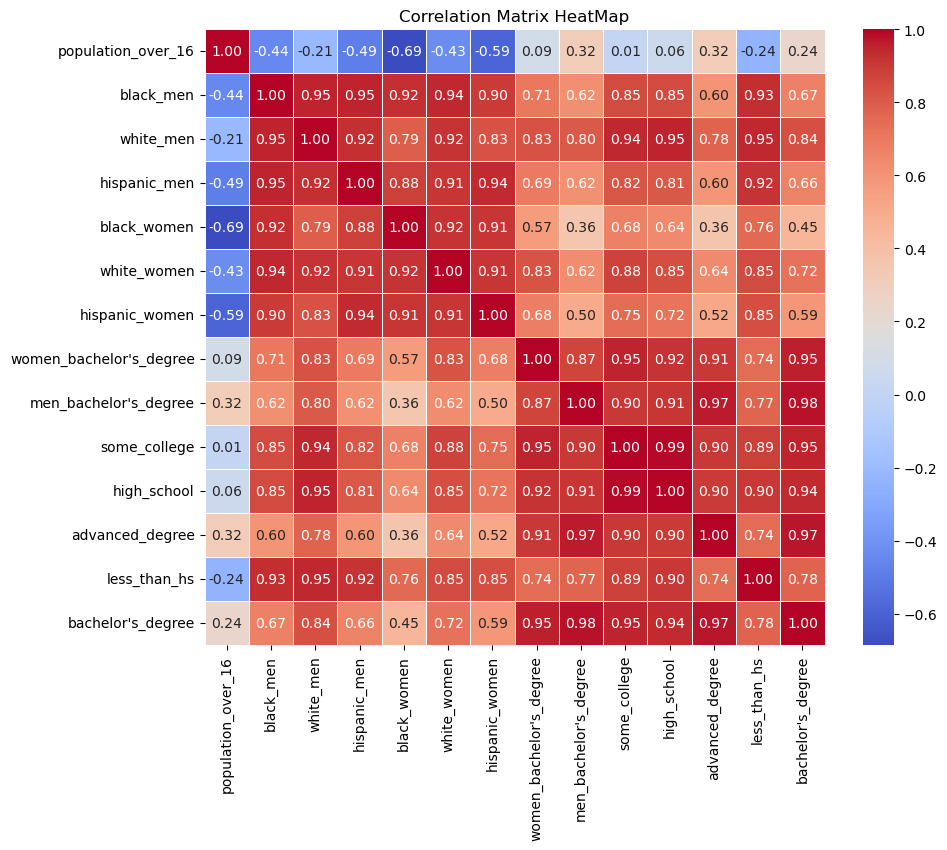

In [23]:
#heat map 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.4)
plt.title('Correlation Matrix HeatMap')
plt.show()


## Flactuations

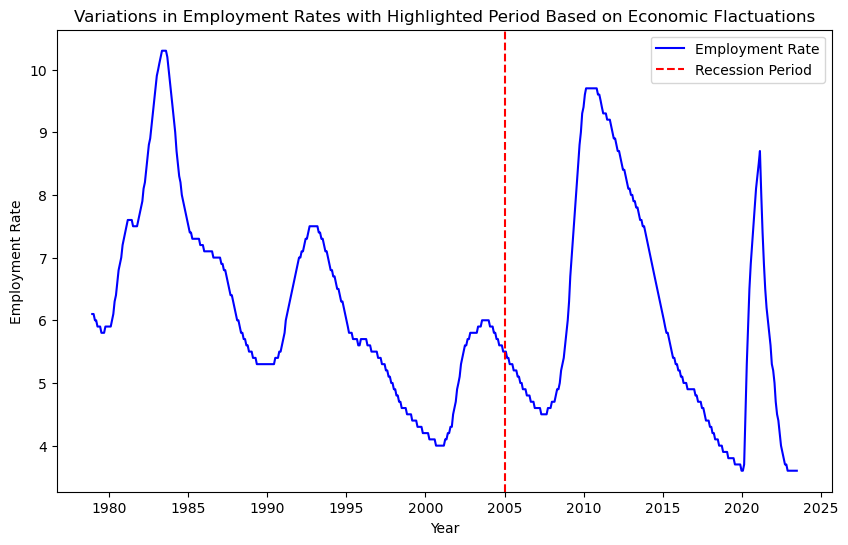

In [24]:
# checking employment rates during economic challenges, such as recessions, and periods of economic prosperity.
# In this case, we can asses the 2008 recessions and economic prosperity

# Visualizing variations in employment rates with a red line from 2005-2020
plt.figure(figsize=(10, 6))

# overall employment rates
sns.lineplot(x='date', y='all', data=df, label='Employment Rate', color='blue')

# A red vertical line for the specified period- 2008-2020
plt.axvline(pd.to_datetime('2005-01-01'), color='red', linestyle='--', label='Recession Period')

plt.title('Variations in Employment Rates with Highlighted Period Based on Economic Flactuations')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()

In [33]:
# Hypothesis analyis

# Reshape data for Tukey-Kramer test
stacked_data = pd.melt(df, value_vars=['16-24', '25-54', '55-64','65+','hispanic', 'white', 'black'])

# Perform Tukey-Kramer test
tukey_results = pairwise_tukeyhsd(stacked_data['value'], stacked_data['variable'])

# Print the results
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   16-24    25-54  -7.4681   -0.0   -7.84 -7.0962   True
   16-24    55-64  -8.5864   -0.0 -8.9583 -8.2145   True
   16-24      65+  -8.7795   -0.0 -9.1514 -8.4076   True
   16-24    black  -0.9817   -0.0 -1.3536 -0.6098   True
   16-24 hispanic  -4.0677   -0.0 -4.4396 -3.6958   True
   16-24    white  -7.5489   -0.0 -7.9208  -7.177   True
   25-54    55-64  -1.1183   -0.0 -1.4902 -0.7464   True
   25-54      65+  -1.3114   -0.0 -1.6833 -0.9395   True
   25-54    black   6.4864   -0.0  6.1145  6.8583   True
   25-54 hispanic   3.4004   -0.0  3.0285  3.7723   True
   25-54    white  -0.0808 0.9954 -0.4527  0.2911  False
   55-64      65+  -0.1931 0.7257  -0.565  0.1788  False
   55-64    black   7.6047   -0.0  7.2328  7.9766   True
   55-64 hispanic   4.5187   -0.0  4.1468  4.8905   True
   55-64    white   1.0375   -0

## Predicting Unemployment Rates

In [ ]:
# Choosing the specific column or target variable after correlation with other variables identified in the heatmap
specific_colum = "all" 
specific = df[specific_colum]

# Splitting the data into training and testing sets
train_size = int(len(specific) * 0.8)
train, test = specific.iloc[:train_size], specific.iloc[train_size:]

# Fitting SARIMA model
order= (1,1,1)
model = SARIMAX(train, order=order) 
fit_model = model.fit()

#let's focus on the future or coming months
future = 120  #120months-10years
future_dates = pd.date_range(start='2023-07-01', periods=future, freq= 'M')


# Make predictions for the future
forecast = fit_model.get_forecast(steps=future)
forecast_index = pd.DatetimeIndex(future_dates)
forecast_values = forecast.predicted_mean

# Plot the predicted values- plt library is in use
plt.figure(figsize=(10, 6))
plt.plot(specific.index, specific, label='Original Data')
plt.plot(forecast_index, forecast_values,'r--', label='Umemployment Rate Future', linewidth='2', marker='o')
plt.title('Unemployment Rate Forecasting')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

# Evaluating the model for the forecasted period 48 months
actual_values_120mnths = df['all']['2023-07-01':]  


# Ensuring the lengths of actual and forecast values match or have element of correlation
if len(actual_values_120mnths) != len(forecast_values):
    min_length = min(len(actual_values_120mnths), len(forecast_values))
    actual_values_120mnths = actual_values_120mnths[:min_length]
    forecast_values = forecast_values[:min_length]

# Calculating Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse_120mnths = mean_squared_error(actual_values_120mnths, forecast_values)
rmse_120mnths = sqrt(mse_120mnths)

print(f'Mean Squared Error (MSE) for 120mnths: {mse_120mnths}')
print(f'Root Mean Squared Error (RMSE) for 120mnths: {rmse_120mnths}')

In [ ]:
# our model is accure (RSME:2.6765799532140337). We are covering a significant percentage of the scale.